## Linear Regression On Temperature And Rents Per Hour ##

The following script contains two main parts; The first creates a clean and rescaled dataset with rents per hour left-joined on the available temperatures per hour for 2019. The idea is to find a correlation between these two features. Therefore it is a good idea to calculate for every hour an average temperature and the rescaling helps to get rid of negative values in the temperature range. The second part creates a model and a visualization for the regression/prediction.

In [69]:
# Import required libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import data from previous results and create DataFrame objects
Weather = pd.read_csv('weather_hourly_boston.csv', sep=',')
Rents = pd.read_csv('KPI_total_rents_per_hour.csv', sep=',')
df_rents = pd.DataFrame(Rents)
df_weather = pd.DataFrame(Weather)

# Clean the weather dataset and get data for 2019 only
df_weather = df_weather.dropna()
begin_2019 = pd.to_datetime('2019-01-01 00:00')
end_2019 = pd.to_datetime('2019-12-31 23:00')
times = pd.to_datetime(df_weather.date_time)
df_weather_2019 = df_weather.loc[(times.dt.year >= 2019) & (times.dt.year <= 2019)]
df_weather_2019 = df_weather_2019.reset_index()
df_weather_2019 = df_weather_2019.set_index('date_time')

# Create the combined dataset. Do a left-join on weather dataset timestamps.
df_weather_2019.index = df_weather_2019.index.rename('hour')
df_weather_and_rents = pd.merge(df_weather_2019,df_rents,on='hour',how='left')
df_weather_and_rents = df_weather_and_rents.drop_duplicates(subset=['hour'], keep='first')
df_weather_and_rents = df_weather_and_rents.dropna()
df_weather_and_rents = df_weather_and_rents.sort_values(by=['hour'])
df_weather_and_rents = df_weather_and_rents.drop('index', axis='columns')
df_weather_and_rents['avg_temp'] = (df_weather_and_rents['max_temp'] + df_weather_and_rents['min_temp'])/2
df_weather_and_rents = df_weather_and_rents.drop(['min_temp','max_temp'], axis='columns')

# Re-scale the data to get rid of negative values of temperature
df_weather_and_rents['rents_count_rescaled'] = (df_weather_and_rents['rents_count'] - df_weather_and_rents['rents_count'].min()) / (df_weather_and_rents['rents_count'].max() - df_weather_and_rents['rents_count'].min())
df_weather_and_rents['avg_temp_rescaled'] = (df_weather_and_rents['avg_temp'] - df_weather_and_rents['avg_temp'].min()) / (df_weather_and_rents['avg_temp'].max() - df_weather_and_rents['avg_temp'].min())

# Prepare finished data for regression and export it as a csv file
df_regression = df_weather_and_rents[['rents_count_rescaled', 'avg_temp_rescaled', 'precip']]
df_regression = df_regression.sort_values(by=['avg_temp_rescaled'])
df_regression = df_regression.reset_index(drop=True)
df_regression.columns = ['rents', 'temperature', 'precip']
df_regression.to_csv('regression_data.csv')

The next little diagram shows that we don't need to take two separate regressions for temperatures with and without precipitation. The resulting difference would be insignificant.

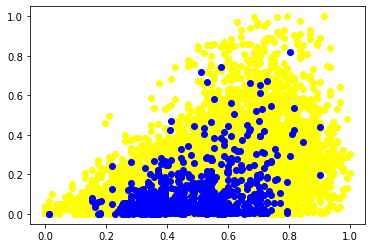

In [70]:
# Get two separate DataFrame objects with and without precipitation
df_precip_no = df_regression.loc[df_regression['precip'] == 0]
plt.scatter(df_precip_no['temperature'], df_precip_no['rents'], color='yellow')
df_precip_yes = df_regression.loc[df_regression['precip'] == 1]
plt.scatter(df_precip_yes['temperature'], df_precip_yes['rents'], color='blue')

# Show results
plt.show()

[0.37505378] -0.03525329753711001


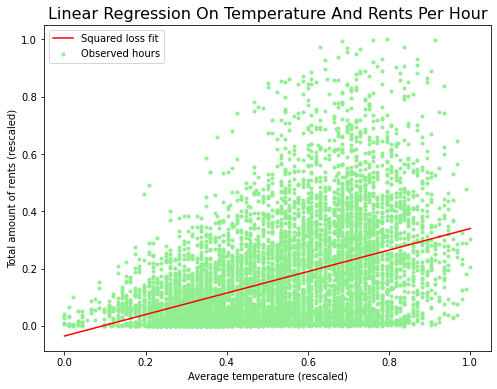

In [71]:
# Define the variables for regression model
X = df_regression['temperature'].values.reshape(-1,1)
y = df_regression['rents']

# Create regression model
linearModel = LinearRegression()
linearModel.fit(X, y)
prediction = linearModel.predict(X)

# Visualize the results
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker=".", linewidths=1, color='lightgreen')
plt.xlabel("Average temperature (rescaled)")
plt.ylabel("Total amount of rents (rescaled)")
plt.plot(X, prediction, color='red')
plt.legend(['Squared loss fit','Observed hours'])
plt.title('Linear Regression On Temperature And Rents Per Hour', fontsize=16)

# Print the coefficients. The whole function will be mentioned in the report.
print(linearModel.coef_, linearModel.intercept_)

# Save visualization as PDF and PNG
plt.savefig('LinearRegression.pdf', dpi=300)
plt.savefig('LinearRegression.png', dpi=300)

# Show results below
plt.show()